## This is Analysis of 12 Month Sales Data of Electronic Shop Sales in 2019. <br><br>
### We Analyze and Answer Several Questions Like <br>
1.What was the best month for sales? How much was earned that month?<br>
2.What city sold the most product?<br>
3.What time should we display advertisemens to maximize the likelihood of customer’s buying product?<br>
4.What products are most often sold together?<br>
5.What product sold the most? Why do you think it sold the most?<br><br>
Analyzing this data Helps to gain Consumers Mindest, Buying Nature and Many other tiny details which can potentially help to boost the sales!

In [1]:
import pandas as pd
import os

## Merging 12 Months Data

In [2]:
# Get a list of all CSV files in the Sales_Data directory, excluding .ipynb_checkpoints 
files = [file for file in os.listdir("./Sales_Data") if file.endswith('.csv') and '.ipynb_checkpoints' not in file]
# Initialize an empty DataFrame to hold all data 
all_months_data = pd.DataFrame()
# Iterate over each file and append its data to the DataFrame
for file in files:
    df = pd.read_csv("./Sales_Data/" + file) 
    all_months_data = pd.concat([all_months_data, df], ignore_index=True)

all_months_data.to_csv("all_data.csv",index=False)

#### Reading Updated Frame

In [3]:
all_data=pd.read_csv("all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Clean Up Data

In [4]:
all_data=all_data.dropna(how="all")

In [5]:
#Removing Month Columns with OR 
all_data=all_data[all_data['Order Date'].str[0:2] !='Or']

#### Convert Columns into Correct Type

In [6]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

## Augment Data With Additional Columns

#### Add Month Column

In [7]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add Sales Column

In [8]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add City Column

In [9]:
#Add City Column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x:f" {get_city(x)} ({get_state(x)})")
all_data['City']

0                  Dallas (TX)
2                  Boston (MA)
3             Los Angeles (CA)
4             Los Angeles (CA)
5             Los Angeles (CA)
                  ...         
186845        Los Angeles (CA)
186846      San Francisco (CA)
186847      San Francisco (CA)
186848      San Francisco (CA)
186849      San Francisco (CA)
Name: City, Length: 185950, dtype: object

# Solving Questions

#### Question 1 What was the best month for sales? How much was earned that month?

In [10]:
results=all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


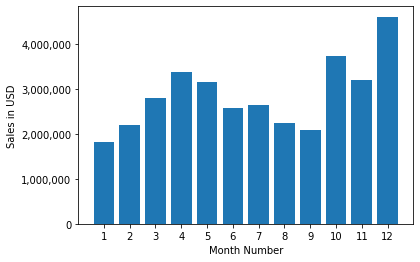

In [11]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel("Month Number")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

Colclusion we get that best month for sales was December with total earnings of 4.6 Million$ <br>
We can also conclude this is due to Christmas 

#### Question 2: What city sold the most product?

In [12]:
results=all_data.groupby('City').sum()
results.sort_values('Sales')

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Portland (ME),2750,447189.25,17144,449758.27
Austin (TX),11153,1809873.61,69829,1819581.75
Portland (OR),11303,1860558.22,70621,1870732.34
Seattle (WA),16553,2733296.01,104941,2747755.48
Dallas (TX),16730,2752627.82,104620,2767975.40
Atlanta (GA),16602,2779908.20,104794,2795498.58
Boston (MA),22528,3637409.77,141112,3661642.01
New York City (NY),27932,4635370.83,175741,4664317.43
Los Angeles (CA),33289,5421435.23,208325,5452570.80


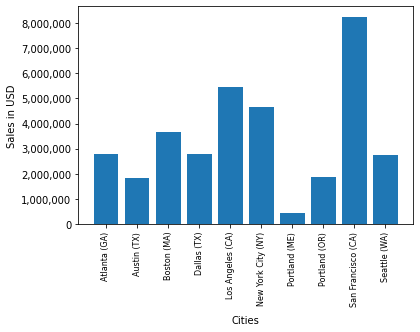

In [13]:
import matplotlib.pyplot as plt
cities=[city for city,df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation="vertical",size="8")
plt.ylabel('Sales in USD')
plt.xlabel("Cities")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

Colclusion we get is San Fransisco(CA) Sold Most product worth 8 Million$

#### Question3 What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [14]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [15]:
all_data['Hours']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


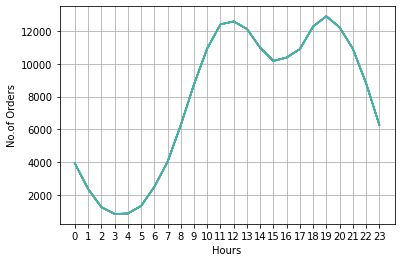

In [16]:
hours=[hour for hour,df in all_data.groupby('Hours')]
plt.plot(hours,all_data.groupby(['Hours']).count())
plt.grid()
plt.xticks(hours)
plt.ylabel('No.of Orders')
plt.xlabel("Hours")
plt.show()

Colclusion we get is theres a spike at 11,12 pm and another spike at 7pm 

#### Question4 What products are most often sold together?

In [20]:
df = all_data[all_data.duplicated('Order ID',keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()


C:\Users\Kandarp\AppData\Local\Temp\ipykernel_34852\438648054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [23]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


From this data we can check for buying trends of customer and this can also help sales by giving some spesific offers on Products that tend to be bought together ! 

#### Question5 What product sold the most? Why do you think it sold the most?

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [42]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']

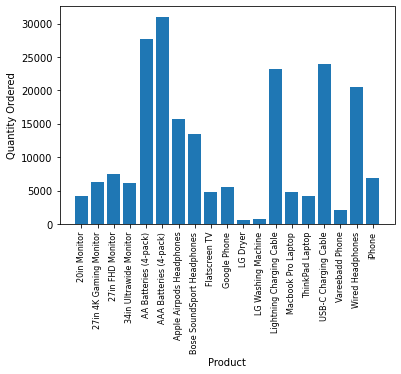

In [37]:
products=[product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

Here We can say AAA Battries are most sold because of Electronic heavy surroundings and Also due to its low price , Because its always gonna be cheaper than LG Dryer !<br>
lets check this hypotheisis by mapping price trend with above graph

C:\Users\Kandarp\AppData\Local\Temp\ipykernel_34852\3591451504.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\Kandarp\AppData\Local\Temp\ipykernel_34852\3591451504.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


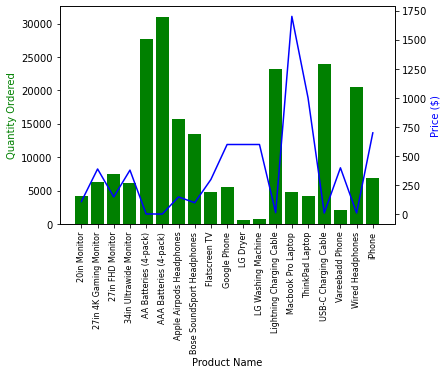

In [40]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

Hence we can say that AAA Batties Sold out most due to its low price ! 

#                                 Thank You ! 